# Exploratory analysis

There are 15,143,219 tweets collected from around 7000 Twitter users.

Further filters identify 2700 Twitter users who live in Sweden.

If we only focus on 2019-2020 time period, we have 134,855 geotagged tweets from 1,518
top geotag users in Sweden.

**Main concerns**

1. The number of geotag Twitter users is too small to explore the association of socio-economic
factors with mobility during pandemic.

2. Small number of geotagged tweets may not support the exploration at the individual level.

**Potential adjustments**

1. Focus on the other countries/regions.

2. Switch to aggregate analysis. For instance, the comparison between origin-destination flow
and the infection statistics.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import subprocess
import pandas as pd
import matplotlib.pyplot as plt

def get_repo_root():
    """Get the root directory of the repo."""
    dir_in_repo = os.path.dirname(os.path.abspath('__file__'))
    return subprocess.check_output('git rev-parse --show-toplevel'.split(),
                                   cwd=dir_in_repo,
                                   universal_newlines=True).rstrip()

ROOT_dir = get_repo_root()
sys.path.append(ROOT_dir)
sys.path.insert(0, ROOT_dir + '/lib')

## 1. Load data

In [3]:
df = pd.read_csv(os.path.join(ROOT_dir, 'dbs/geotweets/geotweets_se.csv'))
df.drop(columns=['Unnamed: 0'], inplace=True)
df.iloc[0]

tw_id                                            1305165791109828611
time                                             2020-09-13 15:25:48
geo_label                                                          1
lat                                                          63.1833
lng                                                            14.65
place_label                                                        1
place_id                                            80fa7d473fb9a545
place_country                                                 Sweden
place_full_name                                   Östersund, Sverige
content            Haft en helt underbar sommar med familjen!❤️\n...
user_name                                                  100021601
user_location                                                 Sweden
user_descp                                                       NaN
user_time_zone                                                   NaN
user_utc_offset                   

In [4]:
# Check only 2019 - 2020
df = df.loc[(df.date.apply(lambda x: x.startswith( '2019' ))) |
(df.date.apply(lambda x: x.startswith( '2020' ))), :]
print("Number of available geotagged tweets:", len(df),
      "\n from number of users:", df.user_name.nunique())

Number of available geotagged tweets: 134855 
 from number of users: 1518


## 2. Data summary

### 2.1 Check the change of geotagged tweets

The below figure shows that the travelling reduced after the start of pandemic in Sweden
on Jan 24, 2020.

Red - international locations.

Blue - domestic locations.

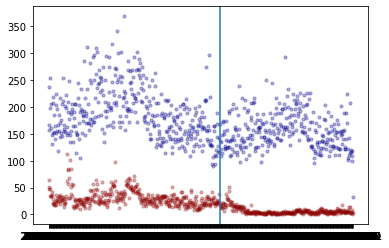

In [5]:
df_date = df.groupby(['date', 'dom']).size()
df_date.name = 'count'
df_date = df_date.reset_index()
plt.scatter(x=df_date.loc[df_date.dom == 1, 'date'],
            y=df_date.loc[df_date.dom == 1, 'count'], color='darkblue', alpha=0.3, s=10)
plt.scatter(x=df_date.loc[df_date.dom == 0, 'date'],
            y=df_date.loc[df_date.dom == 0, 'count'], color='darkred', alpha=0.3, s=10)
plt.axvline(x='2020-01-24')
